# Python *for the practicing neuroscientist*

To be frank:  this section is boring.  Throughout all of the case studies, we will use the software package [Python](https://www.python.org/). The best way to learn new software (and probably most things) is when motivated by a particular problem.  Would you read assembly instructions for furniture you do not plan to own?  Probably not. In other sections we will pursue specific questions driven by neuronal data, and use our desire to understand these data to motivate the development and application of computational methods.  But not in this section.  Here, we focus on basic coding techniques and principles in Python in the abstract, without motivation.  You - poor reader - must trust that these ideas and techniques will eventually be useful.  We begin by dipping our toe into the Python pool, and learning the basic strokes;  the fun and interesting parts in the "real world" of neuronal data happen later.

Let us delay no further.  In the following examples, you are asked to execute code in Python.  If your Python experience is limited, you should actually *do* this, not just read the text below.  If you intend to ignore this advice - and not execute the code in Python - then instead walk to the local coffee shop, get a double espresso, and return to attempt these examples.  This chapter follows in spirit and sometimes in detail Chapter 2 of <a href="https://www.elsevier.com/books/matlab-for-neuroscientists/wallisch/978-0-12-383836-0">MATLAB for Neuroscientists</a>, an excellent reference for learning to use MATLAB in neuroscience with many additional examples.  If you have never used Python before, there are many excellent resources online (e.g., the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)).


## Starting Python

There are two ways to interact with this notebook.  First, you could run it locally on your own computer using <a href="https://jupyter.org/">Jupyter</a>. This is an excellent choice, because you'll be able to read, edit and excute the Python code directly and you can save any changes you make or notes that you want to record.  The second way is to open this notebook in your browser using [Binder](https://mybinder.org/v2/gh/Mark-Kramer/Case-Studies-Python/master), and execute the examples directly in your browser, without installing additional software on your computer. In any case, we encourage you to execute each line of code in this file!

<div class="python-note">
    
Throughout this notebook, we assume that you are running [Python 3](https://www.python.org/download/releases/3.0/). Most of the functions used here are the same in Python 2 and 3. One noteable exception however is division. If you are using Python 2, you will find that the division operator `/` actually computes the *floor* of the division if both operands are integers (i.e., no decimal points). For example, in Python 2, `4/3` equals `1`. While, in Python 3, `4/3` equals `1.333`.

We encourage you to use Python 3 for the sake of compatibility with this notebook, as well as for compatibility with future releases of Python.

</div>

## On-ramp: analysis of neural data in Python
We begin this module with an "*on-ramp*" to analysis in Python. The purpose of this on-ramp is to introduce you immediately to some aspects of Python. You may not understand all aspects of the Python language here, but that's not the point. Instead, the purpose of this on-ramp is to  illustrate what *can* be done. Our advice is to simply run the code below and see what happens...

Sampling frequency is 1000.0 Hz.
Total duration of recording is 100.0 s.
Dimensions of data are (100000,) data points.


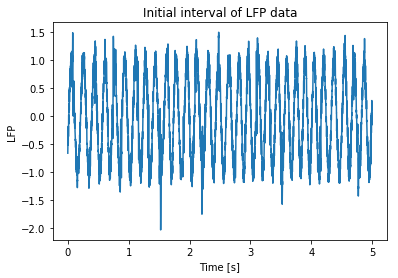

In [1]:
import scipy.io as sio               # Import packages to read data, do analysis, and plot it.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

mat = sio.loadmat('sample_data.mat') # Load the example data set.
t   = mat['t'][0]                    # Get the values associated with the key 't' from the dictorary.
LFP = mat['LFP'][0]                  # Get the values associated with the key 'LFP' from the dictorary

                                     # Print useful information about the data.
print("Sampling frequency is " + str( 1/(t[2]-t[1]))  + ' Hz.')
print("Total duration of recording is " + str(t[-1]) + ' s.')
print("Dimensions of data are " + str(np.shape(LFP)) + ' data points.')

initial_time_interval = t < 5        # Choose an initial interval of time, from onset to 5 s,
                                     # ... and plot it.
plt.plot(t[initial_time_interval], LFP[initial_time_interval])
plt.xlabel('Time [s]')
plt.ylabel('LFP')
plt.title('Initial interval of LFP data');

<div class="question">

**Q:** Try to read the code above. Can you see how it loads data, extracts useful information to print, then selects an interval of data to plot?

**A:** If you've never used Python before, that's an especially difficult question. Please continue on to learn more!

</div>

## Example 1: Python is a calculator

Execute the following commands in Python:

In [2]:
4+9

13

In [3]:
4/3

1.3333333333333333

<div class="question">

**Q:**  What does Python return?  Does it make sense?

</div>

## Example 2.  Python can compute complicated quantities.

Enter the following command in Python:

In [4]:
4/10**2

0.04

<div class="question">

**Q:** Does this answer make sense?

</div>

<div class="question">

**Q:** Can you use parentheses to change the answer?

</div>

##  Example 3.  Python has useful built in functions.

A function is a program that operates on arguments. Standard math functions and variables (and other useful things) can be accessed from the `math` and `numpy` modules. To use the `math` and `numpy` modules, we must first import both:

In [3]:
import numpy as np
import math

You will often begin your data analysis with `import` statements, to load the functionality you need. We can now call functions from math using `numpy.*`.  For example,

In [4]:
np.sin(2*np.pi)

-2.4492935982947064e-16

Above, `np.sin` is the sine function.  It operates on the argument `2*np.pi`.  Notice that, once we have imported the `numpy` module, Python knows the value of `np.pi`. Here's another example function that operates on arguments:

In [5]:
math.atan(2*np.pi)

1.4129651365067377

<div class="question">

**Q:**  What is `math.atan`?

**A:** To answer this, try using Python Help.  To start the Python Help, simply put a `?` at the end of `math.atan` and then run this code block. 

</div>

In [6]:
math.atan?

You should see a description of the function pop up at the bottom of the window.

**NOTE:**  Python Help is *extremely* useful.  You can always look there when you have questions about a function, or search the internet for help, i.e., [google it](http://www.google.com).

##  Example 4.  We can use Python to define lists of numbers.

In Python, there are several different data structures that are designed to store more than one element. Here we will focus on the `array` data structure, but if you are curious to know how and when to use other structures, there is a good explanation <a href='http://www.physics.nyu.edu/pine/pymanual/html/chap3/chap3_arrays.html'>here</a>. Let's define an array:

In [9]:
a = np.array([[1, 2, 3, 4]])

##  Example 5.  We can manipulate arrays by scalars.

A scalar is a single number.  Consider,

In [10]:
a = np.array( [[1, 2, 3, 4]] )
print( a * 3 )
print( 4 * a )
print( a + 1 )

[[ 3  6  9 12]]
[[ 4  8 12 16]]
[[2 3 4 5]]


<div class="question">
    
**Q:** What do you find?

**A:** Notice that the scalar operates on each element of the array.

</div>

##  Example 6.  We can manipulate arrays with arrays. 

Let's create an array and multiply it by itself,

In [11]:
a = np.array([1,2,3,4])
a * a

array([ 1,  4,  9, 16])

<div class="question">

**Q:**  What does this return?

**A:** We see that the operator `*` performs element-by-element multiplication of the values in array `a`.

</div>

## Example 7. More examples of manipulating arrays with arrays.


In [12]:
a = 2
b = np.array( [[0, 4, 7, 6]] )
c = np.array( [[1, 5, 6, 8]] )

print( b * c )
print( b / c + a)
print( np.multiply( b, c ))


[[ 0 20 42 48]]
[[2.         2.8        3.16666667 2.75      ]]
[[ 0 20 42 48]]


<div class="question">

**Q:** What operation does `np.multiply()` perform?

</div>

## Example 8.  We can probe the variables we've defined in Python.

To see a list of the variables you've defined, type `who` or `whos` in a code block by themselves. Notice `whos` provides more information.

In [13]:
who

LFP	 a	 b	 c	 initial_time_interval	 mat	 math	 np	 plt	 
sio	 t	 


In [14]:
whos

Variable                Type       Data/Info
--------------------------------------------
LFP                     ndarray    100000: 100000 elems, type `float64`, 800000 bytes (781.25 kb)
a                       int        2
b                       ndarray    1x4: 4 elems, type `int64`, 32 bytes
c                       ndarray    1x4: 4 elems, type `int64`, 32 bytes
initial_time_interval   ndarray    100000: 100000 elems, type `bool`, 100000 bytes (97.65625 kb)
mat                     dict       n=5
math                    module     <module 'math' from '/Use<...>h.cpython-36m-darwin.so'>
np                      module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt                     module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sio                     module     <module 'scipy.io' from '<...>es/scipy/io/__init__.py'>
t                       ndarray    100000: 100000 elems, type `float64`, 800000 bytes (781.25 kb)


## Example 9.  Determine the dimensions of an array

To examine the dimensions of an array, we can ask for the `shape`, 

In [15]:
a = np.array([[1,2,3,4]])
print(a.shape)
print(np.shape(a))

(1, 4)
(1, 4)


We find that the shape of `a` is `(1,4)` or 1 row and 4 columns. Notice we have two options to execute the `shape` function:

- In `a.shape` we return the attribute `shape` of the variable `a`. 

- In `np.shape(a)` we apply the function `np.shape` to the variable `a`.

The result is equivalent.

## Example 10. Sometimes we need to reset the workspace

By doing so, we get rid of all the variables. To do so, type `%reset` and enter `y`

In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<div class="question">

**Q.** What command could we use to confirm there are no variables in the workspace?

**A.** Consider `who`.

</div>

In [17]:
who

Interactive namespace is empty.


<div class="python-note">
    
The `%reset` command is an example of a *magic*. Magics are commands that start with the `%` symbol and use a language other than Python. They are only available in the notebook environment. In fact, the set of magics that is available is specific to the notebook kernel. This means that if you have a Jupyter notebook running a Ruby kernel the magics will be different.

</div>

##  Example 11.  We can define matrices in Python.
A matrix is an array with more than one dimension.  Consider the following:

In [18]:
import numpy as np  # Have to reimport as we cleared the workspace above!

p = np.array( [[1,2,3],[4,5,6]] )

This creates a matrix with two rows and three columns. Consider,

In [19]:
print( p )

[[1 2 3]
 [4 5 6]]


<div class="question">

**Q:** Can you see the two rows and three columns?

</div>

We can manipulate matrices like we manipulate vectors. 

In [20]:
print( p + 2 )
print( 2 * p )
print( p * p )

[[3 4 5]
 [6 7 8]]
[[ 2  4  6]
 [ 8 10 12]]
[[ 1  4  9]
 [16 25 36]]


##  Example 12.  Indexing matrices and vectors.
Matrices and vectors are arrays of numbers, and sometimes we want to
access individual elements or small subsets of these lists.  That's
easy to do in Python.  Consider,

In [21]:
a = np.array( [1, 2, 3, 4, 5] )
b = np.array( [6, 7, 8, 9, 10] )

 Python indexes from 0 (like C, C++, Java, and unlike MATLAB and Fortran which start at 1). 
 To access the 2nd element of `a` or `b`, type `a[1] / b[1]`.
 We'll be a bit fancier with our printing now to distinguish variables. 
 Calling `str(a)` converts the variable `a` to a string that can be printed easily.
 Adding two strings just concatenates them: `"hi" + " bye" = "hi bye". `

In [22]:
print( "a[1] = " + str(a[1]) )
print( "b[1] = " + str(b[1]) )

a[1] = 2
b[1] = 7


<div class="question">
    
**Q.**  Do the results make sense?  How would you access the 4th element of each vector?

</div>

  We can combine `a` and `b` to form a matrix with `a` as the first row and `b` as the second.
  Note that we apply the function `np.array()` to the *list* `[a,b]`, which it converts to a matrix.

In [23]:
c = np.array([a,b])
print( "c = \n" + str(c) )    # \n is a newline, or carriage return, which makes the printed matrix lineup better 

c = 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


  To learn the size (or shape)
 of `c` we use `np.shape()`:

In [24]:
print( "shape of c = " + str( np.shape(c) ) )

shape of c = (2, 5)


  The shape of `c` is `[2 5]`.  It has two rows and five columns.  To access
  the individual element in the 1st row and 4th column of `c`, type `c[0,3]`

In [25]:
print( "c[0,3] = " + str( c[0,3] ) )

c[0,3] = 4


<div class="python-note">
    
We access matrices using 'row, column' notation.  So `c[0,3]` means
print the element in row 0, column 3 of `c`.

</div>

<div class="question">

**Q.**  How would you print all rows in the 2nd column of `c`?

</div>

##  Example 13:  We can find subsets of elements in matrices and vectors.
Often we are interested in only some of the elements of a matrix or vector. For example, we might want to look at the data from a single experimental trial which is stored in a particular row of a matrix. Alternatively, we might want to find out when the values in a time series cross a given boundary. Doing this is simple in Python.

### Slicing
*Slicing* means that we want to look at a specific portion of a vector or matrix, for example, the first row of a matrix. We will continue with the matrix `c` from the previous example. The notation '`:`' means '*all indices*'. To access all columns in the entire first row of `c`, type `c[0,:]`. To access the 2nd thru 4th columns of the first row of `c`, type `c[0,1:4]`.

In [26]:
print( "c[0,:] = " + str( c[0,:] ) )
print( "2nd through 4th columns of the first row are c[0,1:4] = " + str(c[0,1:4]) )

c[0,:] = [1 2 3 4 5]
2nd through 4th columns of the first row are c[0,1:4] = [2 3 4]


  <div class="python-note">
    
  The notation `1:4` means *all integers from 1 up to, but not including 4*, 
  which in this case gives columns 1, 2, and 3. 
  
  </div>

Leaving out the number before the colon tells Python to start at index 0. Leaving out the number after the colon tells Python to continue all the way to the end.

In [27]:
print("c[0, :4] = " + str( c[0,:4]))
print("c[0, 1:] = " + str( c[0,1:]))

c[0, :4] = [1 2 3 4]
c[0, 1:] = [2 3 4 5]


We can also tell Python how to step through the indices. To access only the even columns of `c`, we can use the following:

In [28]:
c[0,::2]

array([1, 3, 5])

This code tells Python to start at 0, continue to the end, and step by 2. The result should be the values in row 0, columns 0, 2, and 4 of `c`. We could write this explicitly as `c[0,0:5:2]`.

  ### Selecting elements that satisfy a condition
  Sometimes we're interested in locating particular values within a
  matrix or vector.  As an example, let's first define a vector.
  

In [29]:
a = np.arange(1,10)    # this creates a vector of increasing values from 1 to 9
a = 2*a 

print( "a = " + str(a) )

a = [ 2  4  6  8 10 12 14 16 18]


<div class="question">

**Q.**  Calculate the shape of `a`.  What is the maximum value of `a`? 
*Hint:* Use the `np.max()` function.

</div>

  Now let's find all values in `a` that exceed 10.

In [30]:
a[a > 10]

array([12, 14, 16, 18])

This is called logical indexing, let's look at what `a>10` returns:

In [31]:
lgIdx = a > 10
lgIdx

array([False, False, False, False, False,  True,  True,  True,  True])

When we index `a` using this array `lgIdx` we get back only the entries 
in `a` corresponding to `True`, as above:

In [32]:
a[lgIdx]

array([12, 14, 16, 18])

Sometimes we want to know the actual indices in a where `a > 10`.
We can get them using the `nonzero()` array method, which returns the
index of all entries that were `True`, or non-zero.

In [33]:
lgIdx.nonzero()

(array([5, 6, 7, 8]),)

<div class="python-note">
    
The command `nonzero()` can be used as both a *function* and a *method*. A method is called by adding it after the object it is meant to operate on with a period in between ( `lgIdx.nonzero()` ). A function is called with the *argument* explicitly provided inside the parentheses ( `np.nonzero(lgIdx)` ). Basically, a function and a method do the same thing, but a function needs to be given an argument, while a method assumes that the argument is the object that the method is attached to. Note that if we use `nonzero()` as a function, we need to tell it to look in NumPy for the definition (i.e. add `np.` at the beginning of the function call). 

</div>

Now we have another way to select the desired elements of `a`:

In [34]:
a[ (a > 10).nonzero() ]

array([12, 14, 16, 18])

We can use these two types of indexing to change subsets of the values of `a`.

In [35]:
print("a = " + str(a))
a[a > 10] = 100
print("a = " + str(a))

a = [ 2  4  6  8 10 12 14 16 18]
a = [  2   4   6   8  10 100 100 100 100]


**Q:** How does `a` change in the first and second print statements?

We can perform these same logical operations for a matrix,

In [36]:
b = np.array([[1,2,3],[4,5,6],[7,8,9]])
print( "b = \n" + str(b) )
print( " b > 5 is \n" + str(b > 5) )
print(" b[b>5] is an array: " + str(b[b>5]) )

b = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
 b > 5 is 
[[False False False]
 [False False  True]
 [ True  True  True]]
 b[b>5] is an array: [6 7 8 9]


<div class="python-note">
    
Notice that the last line collapses the `True` entries to an array, 
ordered by row and then by column. If you've used MATLAB, this is 
the opposite of what it does!

</div>

##  Example 14:  Plotting data in Python.
It's not easy to look at lists of numbers and gain an intuitive
feeling for their behavior, especially when the lists are long.  In
these cases, it's better to visualize the lists of numbers by
plotting them.  Consider 

In [37]:
x = np.linspace(0,10,11)   
print( "x = " + str(x) )

#   The above line constructs a vector that starts at 0, ends at 10, and
#   has 11 entries (takes steps of size 1 from 0 to 10). Let

y = np.sin(x)
print( "y = " + str(y) )

x = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
y = [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111]


<div class="question">

**Q.** Looking at the values in 'y' printed above, can you tell what's happending?

**A.** Not really ... let's visualize `y` vs `x` instead.

</div>

### matplotlib
To visualize `y` versus `x` let's plot it. To do so, let's first import some basic plotting routines from `matplotlib`, which provides a nice [2D plotting library](https://matplotlib.org/). We'll also tell Python to show  `matplotlib` graphics inline, in this notebook.

Let's start by plotting a simple example for `x` and `y`,

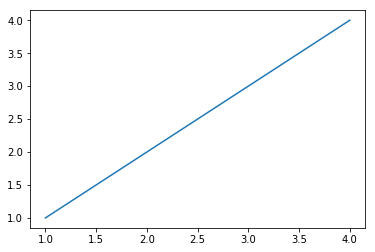

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

x = ([1, 2, 3, 4])
y = x
plt.plot(x,y) 
plt.show()          # this is the plotting equivalent of print()

<div class="question">

**Q.** Does the plot above make sense for the variables `x` and `y`?

</div>

Now, let's go back to the definitions of `x` and `y` that we started this example with and plot `y` versus `x`.

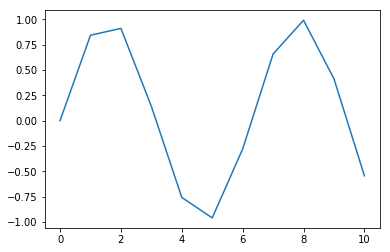

In [39]:
x = np.linspace(0,10,11)   
y = np.sin(x)

plt.plot(x, y)
plt.show()

 The plot of `x` versus `y` should look a bit jagged, and not 
 smooth like a sinusoid.  To make the curve smoother,
 let's redefine `x` as,

In [40]:
x = np.linspace(0,10, 101)
print(x)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


<div class="question">

**Q.**  Compare this definition of `x` to the definition above.  How do these
two definitions differ?

</div>

<div class="question">
    
**Q.**  What is the size of `x`?  Does this make sense?

</div>

Now let's replot the sine function.

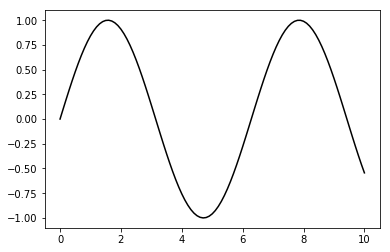

In [41]:
y = np.sin(x)
plt.plot(x,y,'k')   # the 'k' we've added makes the curve black instead of blue
plt.show()

<div class="question">

**Q.** Does this plot make sense, given your knowledge of `x`, `y`, and trigonometry?

</div>

## Example 15: What if we want to compare several functions?

Continuing the example in the previous section, let’s define a second vector

In [42]:
z = np.cos(x)

and plot it:

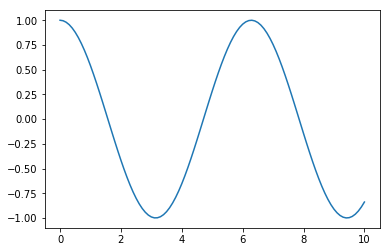

In [43]:
plt.plot(x,z)
plt.show()

We’d now like to compare the two variables `y` and `z`. To do this, let’s plot both vectors on
the same figure, label the axes, and provide a legend,

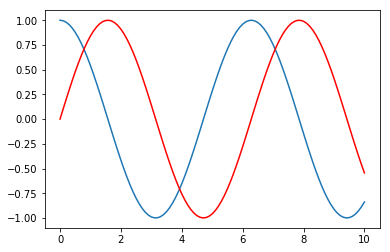

In [44]:
plt.plot(x,z)                     # plot z vs x.
plt.plot(x,y,'r')                 # plot y vs x in red
plt.show()

Notice that we’ve included a third input to the function `plt.plot`. Here the third input tells Python to draw the curve in a particular color: `'r'` for red. There are many options we can use to plot; to see more, check out the documentation for [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

We can also label the axes, give the figure a title, and provide a legend,

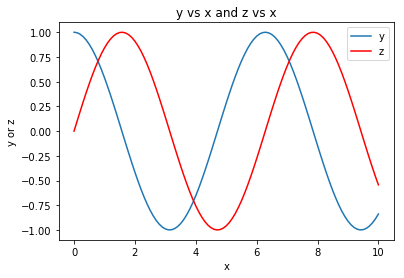

In [45]:
plt.plot(x,z)                     # plot z vs x
plt.plot(x,y,'r')                 # plot y vs x in red
plt.xlabel('x')                   # x-axis label
plt.ylabel('y or z')              # y-axis label
plt.title('y vs x and z vs x')    # title
plt.legend(('y','z'))             # make a legend labeling each line
plt.show()

To futher edit this plot, you might decide - for example - that the font size for the labels is too small. We can change the default with:

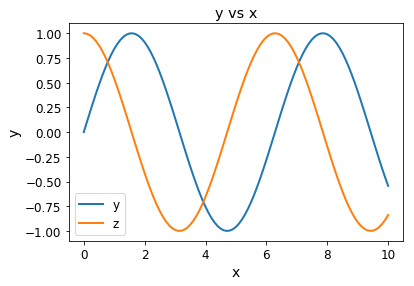

In [46]:
import matplotlib as mpl # we need to import the functions that will do this

mpl.rcParams.update({'font.size': 12})  
mpl.rcParams['axes.labelsize']=14      # make the xlabel/ylabel sizes a bit bigger to match up better

# we can change the default linewidth with
mpl.rcParams['lines.linewidth']=2

# let's make a new plot to check 
plt.plot(x,y, label='y')     # sometimes it is easier to name a trace within the plot() call
plt.plot(x,z, label='z')     # notice without a color matplotlib will assign one
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.legend()
plt.show()

##  Example 16:  We can make random numbers in Python.
To generate a single Gaussian random number in Python, use the function in the NumPy `random` module.

In [47]:
print("a Gaussian random number (mean=0, variance=1): " + str( np.random.randn() ))

# a uniform random number on [0,1)
print("a uniform random number from [0,1): " + str(np.random.rand()))

a Gaussian random number (mean=0, variance=1): -0.9372073320805638
a uniform random number from [0,1): 0.778782479415269


Let's generate a vector of 1000 Gaussian random numbers:

In [48]:
r = np.random.randn(1000)

... and look at a histogram of the vector:

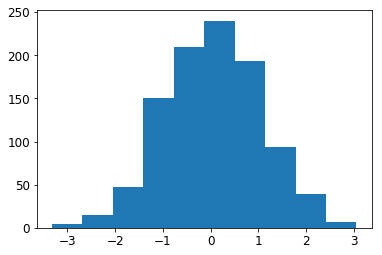

In [49]:
plt.hist(r)
plt.show()

<div class="question">

**Q.** Does this histogram make sense? Is it what you expect for a distribution of Gaussian random variables?

</div>

<div class="python-note">
    
See Python Help (`plt.hist?`) to learn about the function `hist()`.

</div>

##  Example 17:  Repeating commands over and over and over . . . 
  Sometimes we'll want to repeat the same command over and over again.
  For example, what if we want to plot `sin(x + k*pi/4)` where `k` varies from 1 to 5 in
  steps of 1;  how do we do it?  Consider the following:

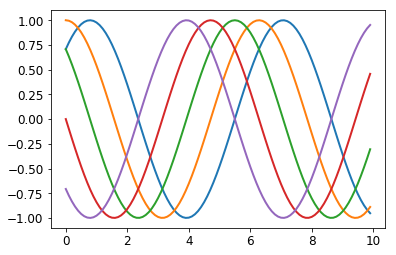

In [50]:
x = np.arange(0,10,0.1)  # Define a vector x that ranges from 0 to 9.9 with step 0.1.
k = 1                    # Fix k=1,
y = np.sin(x + k*np.pi/4)# ... and define y at this k.

plt.figure()             # Make a new figure,
plt.plot(x,y)            # ... and plot y versus x.

k = 2                    # Let's repeat this, for k=2,
y = np.sin(x + k*np.pi/4)# ... and redefine y at this k,
plt.plot(x,y)            # ... and plot it.

k = 3                    # Let's repeat this, for k=3,
y = np.sin(x + k*np.pi/4)# ... and redefine y at this k,
plt.plot(x,y)            # ... and plot it.

k = 4                    # Let's repeat this, for k=4,
y = np.sin(x + k*np.pi/4)# ... and redefine y at this k,
plt.plot(x,y)            # ... and plot it.

k = 5                    # Let's repeat this, for k=5,
y = np.sin(x + k*np.pi/4)# ... and redefine y at this k,
plt.plot(x,y)            # ... and plot it.

plt.show()

That's horrible code!  All I did was cut and paste the same thing four times.  As a general rule, if you're repeatedly cutting and pasting in code, then what you're doing inefficient and typically error prone.  There's a much more elegant way to do this, and it involves making a `for` loop.  Consider:

In [7]:
x = np.arange(0,10,0.1)        # First, define the vector x.

Now let's declare a `for` loop where `k` successively takes the values 1, then 2, then 3, ..., up to 5. Note, any code we want to execute as part of the loop must be indented one level. The first line of code that is not indented, in this case `plt.show()` below, executes after the for loop completes

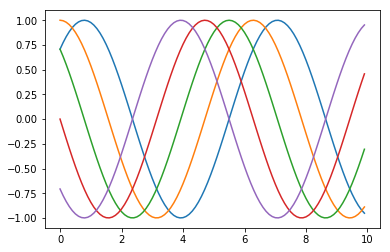

In [8]:
for k in range(1,6):               
    y = np.sin(x + k*np.pi/4)      # Define y (note the variable 'k' in sin), also note we have indented here!
    plt.plot(x,y)                  # Plot y versus x
    
# no indentation now, so this code follows the loop
plt.show() 

The small section of code above replaces all the cutting-and-pasting.
  Instead of cutting and pasting, we update the definition of `y` with different values of `k` and plot it within this for-loop.
  
<div class="question">

**Q.**  Spend some time studying this for-loop.  Does it make sense?

</div>

<div class="python-note">
    
**Important note:** Python uses **indentation** to define `for` loops.

</div>

##  Example 18:  Defining a new function.
We've spent some time in this notebook writing and executing code. Sometimes we'll need to write our own Python functions.  Let's do that now.

Our function will do something very simple: it will take as input a
vector and return as output the vector elements squared plus an additive
constant.

If have a vector, `v`, and a constant, `b`, we would like to call:

    vsq = my_square_function(v, b)
    
This won't work!  We first need to define `my_square_function`. Let's do so now,

In [10]:
def my_square_function(x, c):
    """Square a vector and add a constant.

    Arguments:
    x -- vector to square
    c -- constant to add to the square of x
    
    Returns:
    x*x + c
    """
    
    return x * x + c    

The function begins with the keyword `def` followed by the function name and the inputs in parentheses. Notice that this first line ends with a colon `:`. All of the function components that follow this first line should be **indented one level**. This is just like the `for` loop we applied earlier; the operations performed by the for loop were indented one leve.

<div class="python-note">
    
When defining the function, the code the function executes should be indented one level.

</div>

The text inside triple quotes provides an optional documentation string that describes our function. While optional, including a '*doc string*' is an important part of making your code understandable and reuseable.

The keyword `return` exits the function, and in this case returns the expression `x * x + c`. Note that a return statement with no arguments returns `None`, indicating the absence of a value.

With the function defined, let's now call it. To do so we first define the inputs, and then run the function, as follows:

In [54]:
v = np.linspace(0.,10.,11)
b = 2.5

# Now let's run the code,
v2 = my_square_function(v, b)
print("v = " + str(v))
print("v*v+2.5 = " + str(v2))

v = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
v*v+2.5 = [  2.5   3.5   6.5  11.5  18.5  27.5  38.5  51.5  66.5  83.5 102.5]


To see the doc string that describes our function, type `my_square_function?`

In [11]:
# Let's check that our docstring works
my_square_function?

<div class="question">

**Q.** Try to make a function, my_power, so that 
`y = power(x,n)` evaluates $y = x^n$, 
(in Python you can use `x**n` to take the power)

</div>

## Example 19: Animating figures 
Finally, let's make an animation in Python. To do this we need two additional functions from external modules: `HTML()` and `FuncAnimation()`. `FuncAnimation` is what creates the animated figure, while `HTML` tells the notebook that to interpret the argument as HTML and show the results.

In [13]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In English, we set up (or initialize) the figure and then make a function that does all of the updates for each frame of the animation. Finally, we pass the figure, the function, and the frame numbers to `FuncAnimation()` and we have our animation.

Here's an example in which we plot a sinusoid of different heights, and allow the user to adjust the heights with a slider.

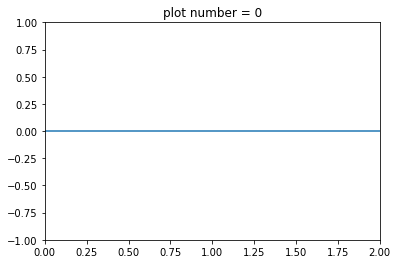

In [15]:
x = np.linspace(0.,2.,1001)                 # Define x from 0 to 2 with 1001 steps.
lines = plt.plot(x, 0. * np.sin(x*np.pi))   # Make the first plot, save the curve in "lines"
plt.axis([0, 2, -1, 1])                     # Set the x and y limits in the plot
plt.title("plot number = 0")                # ... and label the plot.

def animate(frame):                         # Define the function to perform the animation.
    lines[0].set_ydata(float(frame) / 100. * np.sin(x * np.pi)) # Change the y values at each x location
    plt.title('plot number = ' + str(frame))# Update the title with the new plot number
    
fig = FuncAnimation(plt.gcf(), animate, frames=range(100))
HTML(fig.to_jshtml())

## Example 19: Load MATLAB data into Python
For our last example let's load a MATLAB file in the `.mat` format into Python. Before doing so, let's clear all of the variables and functions we have defined. This command is not necessary, but we perform it here so that any new variables we subsequently load are obvious.

In [58]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Then, let's import the `scipy.io` module, which we'll use to import the `.mat` data,

In [59]:
import scipy.io as sio

Now, let's load a data file using the function `loadmat`,

In [60]:
mat = sio.loadmat('sample_data.mat')
type(mat)

dict

The variable that holds the loaded data is a dictionary. In Python, a dictionary is like a list, with the elements of the dictionary accessed via “keys”. Let's print these keys:

In [61]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 't', 'LFP'])


<div class="python-note">
    
Use the `keys()` method to see what variables are contained in `mat`. In other words, run the command `mat.keys()`.

</div>

The two keys of interest to us are `t` and `LFP`. Our collaborator who provided the data tells us that these correspond to a time axis (`t`) and voltage recording (`LFP`), respectively, for her data. Let's define variables to hold the data corresponding to each key,

In [62]:
t = mat['t'][0]                      # Get the values associated with the key 't' from the dictorary.
LFP = mat['LFP'][0]                  # Get the values associated with the key 'LFP' from the dictorary

Now, let's plot the LFP data versus the time axis,

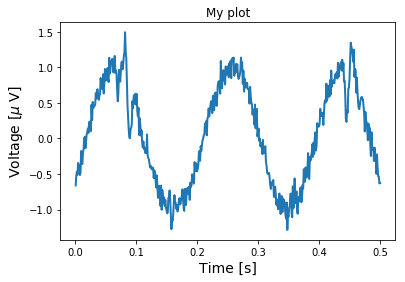

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

# Choose a subset to plot
t = t[0:500]
LFP = LFP[0:500]

plt.plot(t, LFP)
plt.title('My plot')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [$\mu$ V]') # Wrap latex characters in $..$
plt.show()